In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('wandb.csv')
df = df[["method", "n_epochs", "batch_size", "Hit@1"]]
names = df["method"].unique()

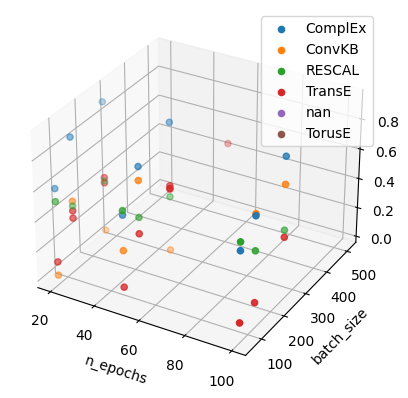

In [7]:
# Create the 3D plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('n_epochs')
ax.set_ylabel('batch_size')
ax.set_zlabel('Hit@1')

for name in names:
    df_ = df[df["method"] == name]
    ax.scatter(df_["n_epochs"], df_["batch_size"], df_["Hit@1"], label=name)

ax.legend()
plt.show()

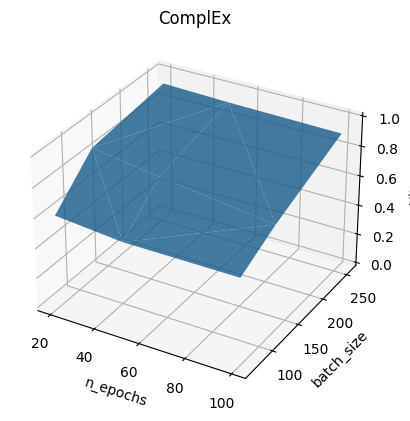

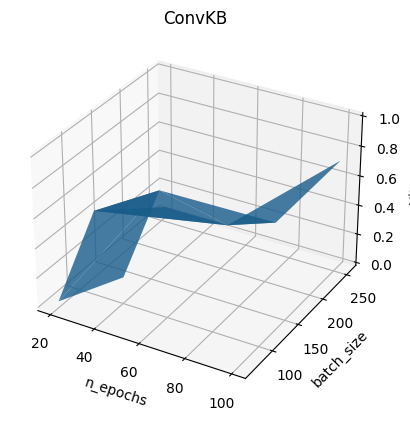

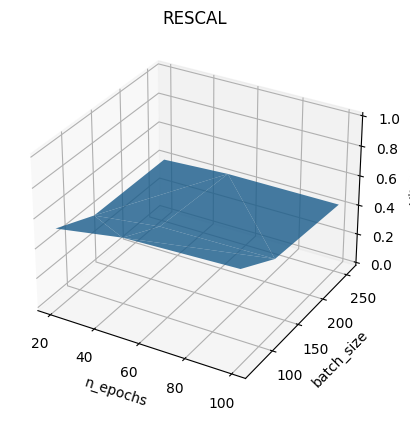

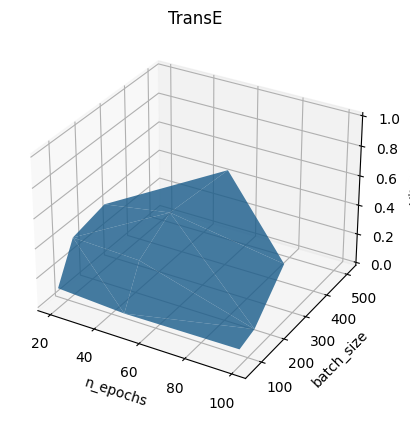

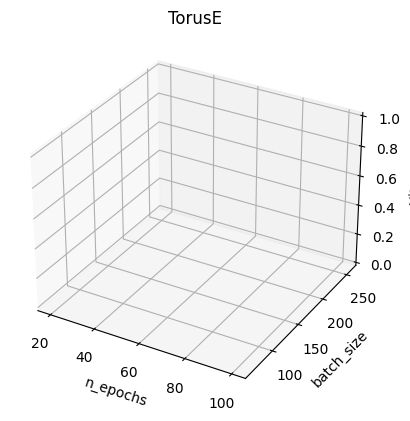

In [13]:
for name in names:
    data = df[df["method"] == name]
    x = data["n_epochs"]
    y = data["batch_size"]
    z = data["Hit@1"]
    # plot the trisurf if there are at least 3 data points
    if len(x) >= 3 and len(y) >= 3 and len(z) >= 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_trisurf(x, y, z, linewidth=0.5, antialiased=True, label=name, alpha=0.8)

        ax.set_xlabel('n_epochs')
        ax.set_ylabel('batch_size')
        ax.set_zlabel('Hit@1')
        ax.set_title(name)
        
        # fix the scale of the Hit@1 axis to 0 to 1
        ax.set_zlim(0, 1)

        plt.show()